## CNN Model TA-D4TI 05 Model C

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

In [4]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

## Set Directory Dataset American Sign Language

In [5]:
train_dir = 'mydata/train_set/'
train_folders = os.listdir(train_dir)
test_dir = 'mydata/test_set/'
test_files = os.listdir(test_dir)

## Build CNN Model

In [6]:
# Part 1 Building the CNN
# Importing the Keras libraries and packages


# Images Dimensions
img_width, img_height = 200, 200
train_data_dir = 'mydata/train_set'
test_data_dir = 'mydata/test_set'
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Conv2D(32, (3, 3), 
                      activation = "relu", 
                      input_shape = (200, 200, 3)))
# Parameter pertama (32) adalah nilai filter nya
# Parameter kedua adalah dimensi filter nya (3×3)
# Parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu)
# Parameter keempat self explained yaitu bentuk input nya dan tipe nya (Grayscale)

# Step 2 - Pooling, Pooling bertujuan untuk mereduksi ukuran gambar
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Conv2D(32, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 3rd Concolution Layer
classifier.add(Conv2D(64, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 4rd Concolution Layer ( New Layer )
classifier.add(Conv2D(64, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Step 3 - Flattening
# Data pooling yang kita miliki berupa array 2 dimensi kemudian dikonversi menjadi data satu dimensi single vector
classifier.add(Flatten())

# Step 4 - Full Connection
# Dense adalah fungsi untuk menambahkan layer yang fully connected.
# Parameter 1 (units)menandakan jumlah node yang harus ada di hidden layer,
# nilainya antara jumlah input node dan output node
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(29, activation = "softmax"))

# Compiling The CNN,optimizer yang digunakan Stochastic Gradient Descent dengan learning rate 0.01 
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Dataset Identification

In [7]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(train_dir + folder)
    print('Reading images from ' + train_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(train_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/train_set/E/ ...
Reading images from mydata/train_set/Y/ ...
Reading images from mydata/train_set/B/ ...
Reading images from mydata/train_set/V/ ...
Reading images from mydata/train_set/space/ ...
Reading images from mydata/train_set/Z/ ...
Reading images from mydata/train_set/N/ ...
Reading images from mydata/train_set/X/ ...
Reading images from mydata/train_set/I/ ...
Reading images from mydata/train_set/T/ ...
Reading images from mydata/train_set/L/ ...
Reading images from mydata/train_set/H/ ...
Reading images from mydata/train_set/D/ ...
Reading images from mydata/train_set/del/ ...
Reading images from mydata/train_set/R/ ...
Reading images from mydata/train_set/O/ ...
Reading images from mydata/train_set/U/ ...
Reading images from mydata/train_set/C/ ...
Reading images from mydata/train_set/J/ ...
Reading images from mydata/train_set/W/ ...
Reading images from mydata/train_set/nothing/ ...
Reading images from mydata/train_set/F/ ...
Reading images from 

In [8]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(test_dir + folder)
    print('Reading images from ' + test_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(test_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/test_set/E/ ...
Reading images from mydata/test_set/Y/ ...
Reading images from mydata/test_set/B/ ...
Reading images from mydata/test_set/V/ ...
Reading images from mydata/test_set/space/ ...
Reading images from mydata/test_set/Z/ ...
Reading images from mydata/test_set/N/ ...
Reading images from mydata/test_set/X/ ...
Reading images from mydata/test_set/I/ ...
Reading images from mydata/test_set/T/ ...
Reading images from mydata/test_set/L/ ...
Reading images from mydata/test_set/H/ ...
Reading images from mydata/test_set/D/ ...
Reading images from mydata/test_set/del/ ...
Reading images from mydata/test_set/R/ ...
Reading images from mydata/test_set/O/ ...
Reading images from mydata/test_set/U/ ...
Reading images from mydata/test_set/C/ ...
Reading images from mydata/test_set/J/ ...
Reading images from mydata/test_set/W/ ...
Reading images from mydata/test_set/nothing/ ...
Reading images from mydata/test_set/F/ ...
Reading images from mydata/test_set/A/ ...

In [9]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data = test_set,
        validation_steps = 20 
      )

# Saving the model
import h5py
classifier.save('Trained_model_C_sibi(5 Epoch 1x1 BlackWhite).h5')

print(model.history.keys())

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 18s 2s/step - loss: 3.3691 - acc: 0.0406 - val_loss: 3.3720 - val_acc: 0.0344
Epoch 2/10
10/10 [==============================] - 3s 297ms/step - loss: 3.3683 - acc: 0.0563 - val_loss: 3.3669 - val_acc: 0.0422
Epoch 3/10
10/10 [==============================] - 4s 432ms/step - loss: 3.3731 - acc: 0.0406 - val_loss: 3.3649 - val_acc: 0.0422
Epoch 4/10
10/10 [==============================] - 4s 419ms/step - loss: 3.3577 - acc: 0.0406 - val_loss: 3.3606 - val_acc: 0.0453
Epoch 5/10
10/10 [==============================] - 4s 422ms/step - loss: 3.3612 - acc: 0.0375 - val_loss: 3.3550 - val_acc: 0.0656
Epoch 6/10
10/10 [==============================] - 4s 419ms/step - loss: 3.3572 - acc: 0.0594 - val_loss: 3.3569 - val_acc: 0.0328
Epoch 7/10
10/10 [==============================] - 4s 422ms/step - loss: 3.3590 - acc: 0.0312 - val_loss: 3.3541 - val_acc: 0.0344
Epoch 8/10
10/10 [============

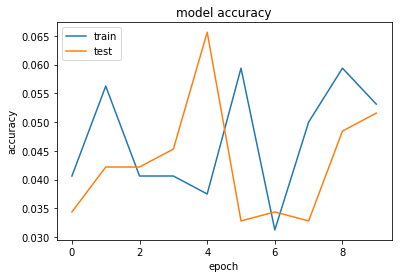

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

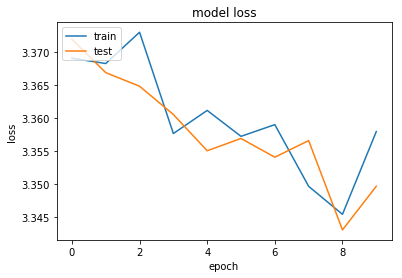

In [11]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()